# Lab 2 - Data Visualization - 21KHDL

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

# Dataset Description ⛳
- Source : https://www.kaggle.com/netflix-inc/netflix-prize-data

- Netflix held the Netflix Prize open competition for the best algorithm to predict user ratings for films.

# About the given Datasets 📁📂

**Movie File Description**
- Movie File Contains `Movie_ID, Name, Year`

**Rating File Description**
- Rating File Contains `Movie_ID, User_ID, Rating`
- Rating : `1 - 5`

# Table of Contents

1. [Import all the necessary libraries](#1.-Import-all-the-necessary-libraries)
2. [Basic Data Exploration](#2.-Basic-Data-Exploration)
3. [EDA](#3.-EDA)
4. [Insights](#4.-Insights)
5. [References](#5.-References)

### 1. Import neccessary libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

### 2. Basic Data Exploration

In [168]:
df_movie = pd.read_csv("data/Netflix_Dataset_Movie.csv")
df_rating = pd.read_csv("data/Netflix_Dataset_Rating.csv")

In [169]:
# Merging them on the basis of Movie Id
df_rating_movie = pd.merge(df_movie, df_rating, left_on = "Movie_ID", right_on = "Movie_ID", how = "inner" )

df_ratings_movies_summary = df_rating_movie.groupby(['Movie_ID', 'Year', 'Name']).agg(
    Rating_Mean=('Rating', 'mean'),
    Count_Reviews=('User_ID', 'count')
).reset_index()

#### How many rows and columns of our data?

In [170]:
print(f'The Rating Dataset contains, Rows: {df_rating.shape[0]} & Columns: {df_rating.shape[1]}')

The Rating Dataset contains, Rows: 17337458 & Columns: 3


In [171]:
print(f'The Movie Title Dataset contains, Rows: {df_movie.shape[0]} & Columns: {df_movie.shape[1]}')

The Movie Title Dataset contains, Rows: 17770 & Columns: 3


#### Check first 5 entries of the 2 dataset

In [172]:
df_movie.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [173]:
df_rating.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


#### Basic Information about the 2 dataframe

In [174]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


In [175]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB


#### Identifying missing values

In [176]:
df_rating.isnull().sum()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

In [177]:
df_movie.isnull().sum()

Movie_ID    0
Year        0
Name        0
dtype: int64

#### Identifying duplicate values

In [178]:
df_rating.duplicated().sum()

0

In [179]:
df_movie.duplicated().sum()

0

In [180]:
df_movie['Year'].describe().astype('int')

count    17770
mean      1990
std         16
min       1915
25%       1985
50%       1997
75%       2002
max       2005
Name: Year, dtype: int32

- The movies in the dataset span from `1915 to 2005`, covering a wide range of years. This suggests that the dataset contains movies from different historical periods, providing a diverse collection for analysis.
- The mean year of the movies in the dataset is around `1990`. This indicates that, on average, the movies in the dataset were released around the early `1990s`.
- The median year is `1997`, which indicates that half of the movies in the dataset were released before `1997` and the other half after. (see same for `25%` and `75%`)

In [181]:
print("Unique Values :\n",df_movie.nunique())

Unique Values :
 Movie_ID    17770
Year           91
Name        17297
dtype: int64


- There are `17770` distinct movies represented in the dataset.
- The movies in the dataset span across `91` different years of release.
- The discrepancy between the number of unique movie IDs (`17770`) and unique movie names (`17297`) suggests that there might be some movies with multiple entries or variations in naming (e.g., different spellings, translations, or alternative titles).

### 3. EDA

#### Number of Ratings per User

In [182]:
no_of_rated_per_users = df_rating.groupby(by='User_ID')['Rating'].count().sort_values(ascending=False)
no_of_rated_per_users.head()

User_ID
305344     1344
387418     1339
2439493    1324
2118461    1305
1664010    1257
Name: Rating, dtype: int64

In [183]:
no_of_rated_per_users.describe()

count    143458.000000
mean        120.853895
std          79.783702
min           5.000000
25%          67.000000
50%          95.000000
75%         147.000000
max        1344.000000
Name: Rating, dtype: float64

- There are `143458` users who have rated at least one movie.
- On average, a user has rated about `121` movies.
- The standard deviation is approximately `80`, which indicates a significant variation in the number of movies rated by different users.
- The range of rating is between `5 and 1344`
- The median user has rated `95` products. This means that half of the users have rated more than `95` products and half have rated fewer. (see same for `25%` and `75%`)

#### Number of Ratings per Movie

In [184]:
no_of_rated_per_movies = df_rating.groupby(by='Movie_ID')['Rating'].count().sort_values(ascending=False)
no_of_rated_per_movies.head()

Movie_ID
1905    117075
2452    102721
4306    102376
571     101450
3860     98545
Name: Rating, dtype: int64

In [185]:
no_of_rated_per_movies.describe()

count      1350.000000
mean      12842.561481
std       17805.334719
min        1042.000000
25%        2607.750000
50%        5229.000000
75%       14792.000000
max      117075.000000
Name: Rating, dtype: float64

- There are `1350` movies who have rated at least one.
- On average, a movie has rated by `12843` users.
- The standard deviation is approximately `17805`, which indicates a significant variation in the number of ratings received by different movies.
- The range of rating of a movie is between `1042 and 14792`
- The median movie has received `5229` ratings. This means that half of the movies have received more than 5,229 ratings and half have received fewer. (see same for `25%` and `75%`)

In [186]:
no_of_rated_per_movies.describe()

count      1350.000000
mean      12842.561481
std       17805.334719
min        1042.000000
25%        2607.750000
50%        5229.000000
75%       14792.000000
max      117075.000000
Name: Rating, dtype: float64

#### Analysis of Movie Ratings Distribution

In [187]:
f = ['count','mean']
df_movie_summary = df_rating.groupby('Movie_ID')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

df_movie = df_movie.set_index('Movie_ID')

In [188]:
data = df_rating['Rating'].value_counts()

trace = go.Bar(x = data.index,y = data.values,text = ['{:.1f} %'.format(val) for val in (data.values / df_rating.shape[0] * 100)],textposition = 'auto')

layout = dict(title = 'Distribution of {} Movie-ratings'.format(df_rating.shape[0]), xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Movies'))

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)

**Insights:** The majority of movies are rated at a good level or higher (from `3 or higher`) accounting for `84.7%`, of which the most is at level `3` with `34%`.

<Figure size 1600x800 with 0 Axes>

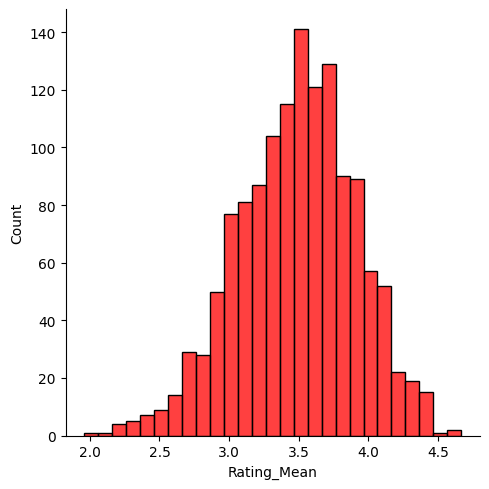

In [189]:
plt.figure(figsize=(16,8))
sns.displot(data=df_ratings_movies_summary['Rating_Mean'], color='r')

**Insights:**: As we can see most of the average ratings fall between `3.5 and 3.7` which can show that most of the movies have quite high average ratings. Very few movies have a low average score of `2.5 or less`.

#### Distribution of Movie Releases Year-wise

In [190]:
data = df_movie['Year'].value_counts()

trace = go.Bar(x = data.index,y = data.values,text = ['{:.1f} %'.format(val) for val in (data.values / df_movie.shape[0] * 100)],textposition = 'auto')

layout = dict(title = 'Distribution of {} Movie - Year-wise'.format(df_rating.shape[0]), xaxis = dict(title = 'Year'), yaxis = dict(title = 'Movies'))

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)

**Insights:** As we can see, the number of movies tends to increase over the years. The highlight was at the beginning of the `21st` century and peaked in `2004` with `1436` films. But suddenly there was a significant decrease in `2005` indicating a significant decline or possibly due to insufficient data collection starting in 2005.

`2004` is the year with the largest number of movies in the dataset. Let's analyze the rating distribution this year.

In [191]:
df_2004 = df_movie[df_movie['Year']==2004]
df_2004 = df_2004.merge(df_rating,on='Movie_ID')

data = df_2004['Rating'].value_counts()

trace = go.Bar(x = data.index,y = data.values,text = ['{:.1f} %'.format(val) for val in (data.values / df_2004.shape[0] * 100)],textposition = 'auto')

layout = dict(title = 'Distribution of {} Movie-ratings released in 2004'.format(df_rating.shape[0]), xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Movies'))

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)

**Insights:** Similar to the rating distribution chart over the years above, in this chart the majority of ratings fall from `level 3 or higher`, with the highest at level `4` with `33.6%` of ratings, followed by level `3 and 5` corresponds to `28.3% and 23.2%`.

#### Distribution of Ratings for the Most Number of Ratings Movie

In [192]:
df_max_ratings = df_movie_summary[df_movie_summary['count']==df_movie_summary['count'].max()]

req_MID = df_max_ratings.index[0]
df_max_ratings = df_rating[df_rating['Movie_ID'] ==req_MID]

df_movie = df_movie.reset_index()
Movie_name_max_raings = df_movie['Name'][df_movie['Movie_ID']==req_MID].to_string(index=False)

data = df_max_ratings['Rating'].value_counts()

trace = go.Bar(x = data.index,y = data.values,text = ['{:.1f} %'.format(val) for val in (data.values / df_max_ratings.shape[0] * 100)],textposition = 'auto')

layout = dict(title = 'Distribution of Most Rated Movie -'+Movie_name_max_raings+ ' Movie-Ratings')

fig = go.Figure(data=[trace], layout=layout)

iplot(fig)

**Insights:** Very impressive for the movie with the most number of ratings, the majority of ratings fall into the two highest levels (`levels 4 and 5`) with respective percentages of `37.1` and `41.7%`, showing the quality of the movie `Pirates of the Caribbean: The Curse of the Black Pearl`.

#### The most common words in movie titles

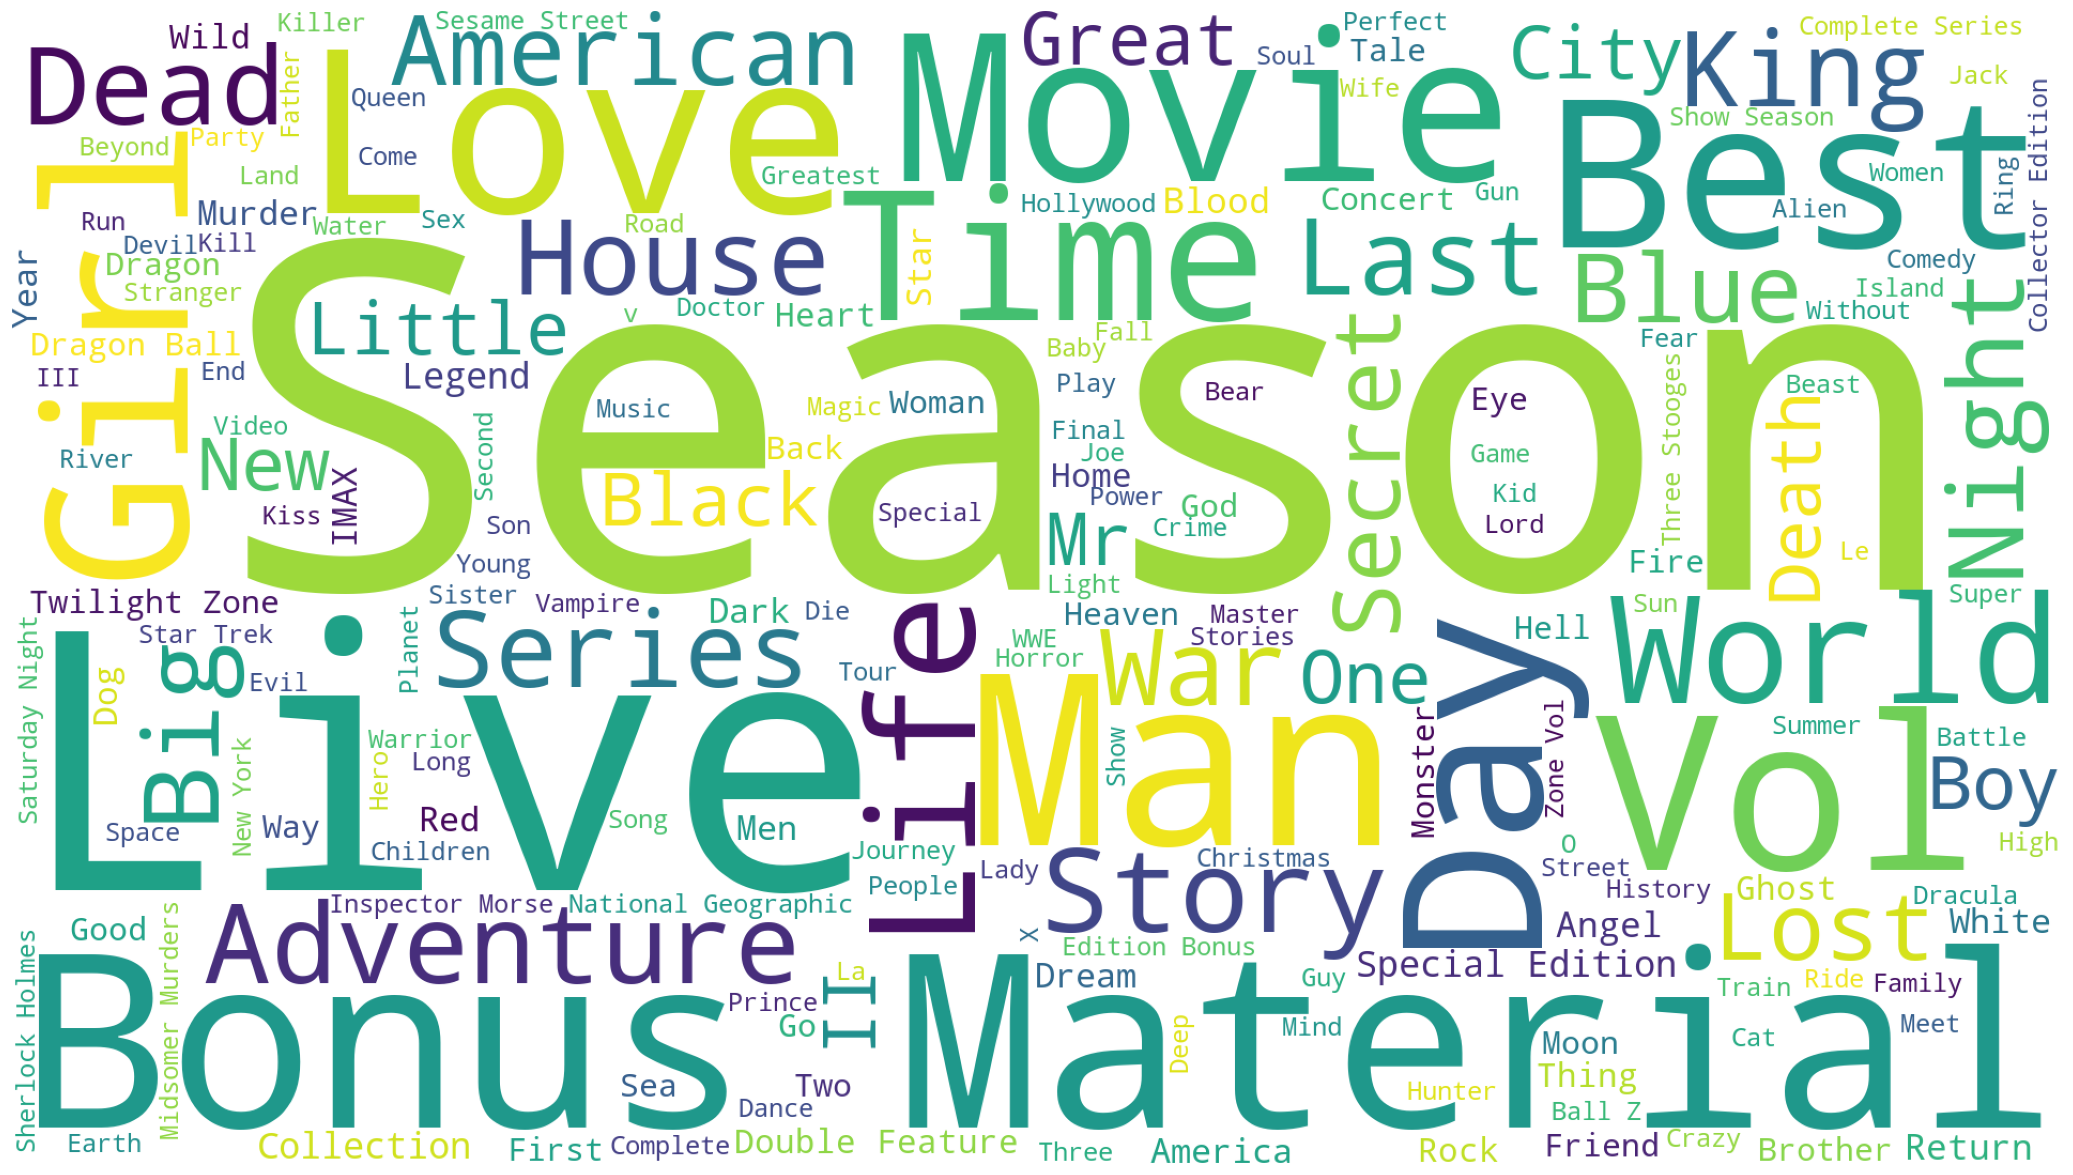

In [193]:
plt.subplots(figsize=(30,15))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_movie.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

**Insights:**

The visual impact of the word cloud makes it easy to identify the most prominent topic of movie at a glance
- The most prominent words seem to be `Bonus`, `Material`, `Season`, `Love`, `Story`. This suggests that these themes are quite prevalent in this movie dataset.
- Words like `Adventure`, `Murder`, `Music`, `Comedy`, `Horror`, and `Concert` could indicate the outstanding `genres or types` of movies.
- `New York`, `East`, `America`, `Space`, and `Sea` could be potential locations that are common in this dataset.

#### Top 10 most rated movies

In [194]:
df_ratings_movies_summary.sort_values('Rating_Mean', ascending=False).head(10)

,Movie_ID,Year,Name,Rating_Mean,Count_Reviews
1038,3456,2004,Lost: Season 1,4.665432,4860
630,2102,1994,The Simpsons: Season 6,4.589824,7331
1034,3444,2004,Family Guy: Freakin' Sweet Collection,4.520766,8090
452,1476,2004,Six Feet Under: Season 4,4.461601,8581
1269,4238,2000,Inu-Yasha,4.457774,1042
781,2568,2004,Stargate SG-1: Season 8,4.456026,1535
396,1256,1994,The Best of Friends: Vol. 4,4.449168,8774
1329,4427,2001,The West Wing: Season 3,4.436258,5185
746,2452,2001,Lord of the Rings: The Fellowship of the Ring,4.431489,102721
595,1947,2002,Gilmore Girls: Season 3,4.428943,3849


#### Top 10 most count reviews movies

In [195]:
df_ratings_movies_summary.sort_values('Count_Reviews', ascending=False).head(10)

,Movie_ID,Year,Name,Rating_Mean,Count_Reviews
587,1905,2003,Pirates of the Caribbean: The Curse of the Bla...,4.146334,117075
746,2452,2001,Lord of the Rings: The Fellowship of the Ring,4.431489,102721
1291,4306,1999,The Sixth Sense,4.311469,102376
184,571,1999,American Beauty,3.937733,101450
1162,3860,2003,Bruce Almighty,3.404323,98545
857,2862,1991,The Silence of the Lambs,4.303809,95053
1199,3962,2003,Finding Nemo (Widescreen),4.395904,94235
1331,4432,2003,The Italian Job,3.711533,93886
1191,3938,2004,Shrek 2,4.121559,92893
837,2782,1995,Braveheart,4.265251,91502


**Insights: (from 2 table about top 10 most rating and count reviews movies)**
- The top-rated movie or show is `Lost: Season 1` with an average rating of approximately `4.67`. However, it’s interesting to note that the highest-rated items are not necessarily the most reviewed. This could suggest that niche content can sometimes have higher ratings due to a dedicated fan base.
-  `Pirates of the Caribbean: The Curse of the Black Pearl` has the highest number of reviews, but its average rating is lower than the top-rated movies or shows. This could suggest that while it’s popular and widely watched, viewers' opinions on it vary more widely.
- `Lord of the Rings: The Fellowship of the Ring` stands out as it appears in both lists - it’s both one of the top-rated and most reviewed movies. This suggests that it’s both popular and highly regarded by viewers.
- There doesn’t seem to be a direct correlation between the number of reviews and the average rating. For instance, `Bruce Almighty` has a high number of reviews but a relatively lower average rating. This suggests that a high number of reviews does not necessarily mean a high rating and vice versa.

#### Best movies each year

In [196]:
# Best movies by year
df_ratings_movies_summary['Year'] = df_ratings_movies_summary['Year'].astype(int)

# Group by 'Year' and calculate the max 'Rating_Mean' and 'Count_Reviews'
grouped = df_ratings_movies_summary.groupby('Year').agg(
    Biggest_Rating_Mean=('Rating_Mean', 'max'),
    Biggest_Count_Reviews=('Count_Reviews', 'max')
)

# Merge with original dataframe to get the corresponding 'Name'
result = pd.merge(
    grouped, 
    df_ratings_movies_summary, 
    how='left', 
    left_on=['Year', 'Biggest_Rating_Mean'], 
    right_on=['Year', 'Rating_Mean']
)

# Select necessary columns and rename them
result = result[['Year', 'Biggest_Rating_Mean', 'Name', 'Biggest_Count_Reviews']].rename(
    columns={'Name': 'Biggest_Rating_Name'}
)

# Sort by 'Year' in descending order and display the first 5 rows
result.sort_values('Year', ascending=False).head(10)

,Year,Biggest_Rating_Mean,Biggest_Rating_Name,Biggest_Count_Reviews
72,2005,4.244315,Batman Begins,37558
71,2004,4.665432,Lost: Season 1,92893
70,2003,4.395904,Finding Nemo (Widescreen),117075
69,2002,4.428943,Gilmore Girls: Season 3,81371
68,2001,4.436258,The West Wing: Season 3,102721
67,2000,4.457774,Inu-Yasha,86756
66,1999,4.359459,Friends: Season 6,102376
65,1998,4.267910,Stargate SG-1: Season 2,69461
64,1997,3.989478,Princess Mononoke,69105
63,1996,4.203978,Babylon 5: Season 4,38873


**Insights:** 
- The data shows a general trend of increasing ratings over the years, with the highest mean rating being `4.665` in `2004` for `Lost: Season 1`. However, there is a slight dip in the mean rating in `1997` for `Princess Mononoke` with a rating of `3.989`. This could be due to various factors such as changes in audience preferences, the quality of movies/series released that year, etc.
- The list includes a variety of content types, including movies like `Batman Begins` and `Princess Mononoke`, animated films like `Finding Nemo (Widescreen)`, and TV series like `Lost: Season 1` and `Friends: Season 6`. This indicates a diverse range of content that appeals to audiences over years.

In [197]:
df_ratings_movies_summary['Movie Title Length'] = df_ratings_movies_summary['Name'].str.len()

fig = px.scatter(df_ratings_movies_summary, x='Movie Title Length', y='Rating_Mean', trendline="ols")
fig.show()

**Insights:** 
- There appears to be a `slight positive correlation` between the `length of a movie’s title` and its `mean rating`. This means that movies with longer titles tend to have slightly higher ratings. However, this correlation is not strong, and there are many exceptions.
- `Outliers`: There are a few movies with particularly long titles can be up to `66, 67` characters. It would be interesting to investigate these further to see if they share any common characteristics besides having long titles.

### 4. Insights

After analyzing this Netflix Movie Rating Dataset, here are some insight should be interesting:

1. There are `143458` users who have rated at least one movie. There are `1350` movies who have rated at least one.

2. On average, a user has rated about `121` movies. On average, a movie has rated by  `12843` users.

3. The majority of movies are rated at a good level or higher (from `3 or higher`) accounting for `84.7%`, of which the most is at level `3` with `34%`.
5. Most of the average ratings fall between `3.5 and 3.7` which can show that most of the movies have quite high average ratings. Very few movies have a low average score of `2.5 or less`.

6. The number of movies tends to increase over the years. The highlight was at the beginning of the `21st` century and peaked in `2004` with `1436` films. But suddenly there was a significant decrease in `2005` indicating a significant decline or possibly due to insufficient data collection starting in 2005.

7. Very impressive for the movie with the most number of ratings, the majority of ratings fall into the two highest levels (`levels 4 and 5`) with respective percentages of `37.1` and `41.7%`, showing the quality of the movie `Pirates of the Caribbean: The Curse of the Black Pearl`.

8. The most prominent words seem to be `Bonus`, `Material`, `Season`, `Love`, `Story`. This suggests that these themes are quite prevalent in this movie dataset.
9. Words like `Adventure`, `Murder`, `Music`, `Comedy`, `Horror`, and `Concert` could indicate the outstanding `genres or types` of movies.

10. The top-rated movie or show is `Lost: Season 1` with an average rating of approximately `4.67`. However, it’s interesting to note that the highest-rated items are not necessarily the most reviewed. This could suggest that niche content can sometimes have higher ratings due to a dedicated fan base.

11. `Pirates of the Caribbean: The Curse of the Black Pearl` has the highest number of reviews, but its average rating is lower than the top-rated movies or shows. This could suggest that while it’s popular and widely watched, viewers' opinions on it vary more widely.

12. `Lord of the Rings: The Fellowship of the Ring` stands out as it appears in both lists - it’s both one of the top-rated and most reviewed movies. This suggests that it’s both popular and highly regarded by viewers.

13. There doesn’t seem to be a direct correlation between the number of reviews and the average rating. For instance, `Bruce Almighty` has a high number of reviews but a relatively lower average rating. This suggests that a high number of reviews does not necessarily mean a high rating and vice versa.

14. The data shows a general trend of increasing ratings over the years, with the highest mean rating being `4.665` in `2004` for `Lost: Season 1`. However, there is a slight dip in the mean rating in `1997` for `Princess Mononoke` with a rating of `3.989`. This could be due to various factors such as changes in audience preferences, the quality of movies/series released that year, etc.

15. The list films with most ratings and count reviews includes a variety of content types, including movies like `Batman Begins` and `Princess Mononoke`, animated films like `Finding Nemo (Widescreen)`, and TV series like `Lost: Season 1` and `Friends: Season 6`. This indicates a diverse range of content that appeals to audiences over years.

16. There appears to be a `slight positive correlation` between the `length of a movie’s title` and `its mean rating`. This means that movies with longer titles tend to have slightly higher ratings. However, this correlation is not strong, and there are many exceptions.

### 5. References

[1] [Netflix Movie Rating Dataset from Kaggle](https://www.kaggle.com/datasets/rishitjavia/netflix-movie-rating-dataset/data)

[2] https://www.kaggle.com/code/ragnarok007/uas-ai-grup-a-netflix

[3] https://www.kaggle.com/code/rishitjavia/movie-recommendation-using-netflix-movie-reviews#3.-Analyze-Data

[4] [Storytelling with data book](https://github.com/Saurav6789/Books-/blob/master/storytelling-with-data-cole-nussbaumer-knaflic.ptrain_df)

---
## <center>THE END</center>

## <center>THANK YOU</center>